# Wine 데이터로 군집화 하고 실루엣 분석하기 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

## - 차원축소

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std) # 정규화한 데이터 차원 축소
wine_df = pd.DataFrame(wine_pca, columns= ['PC1','PC2'] )
wine_df['target'] = wine.target
wine_df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


## - 군집화

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021) # target 3개
kmeans.fit(wine_std) # 정규화한 데이터 Kmeans

KMeans(n_clusters=3, random_state=2021)

In [15]:
wine_df['cluster'] = kmeans.labels_
wine_df.head()

,PC1,PC2,target,cluster
0,3.316751,-1.443463,0,0
1,2.209465,0.333393,0,0
2,2.516740,-1.031151,0,0
3,3.757066,-2.756372,0,0
4,1.008908,-0.869831,0,0


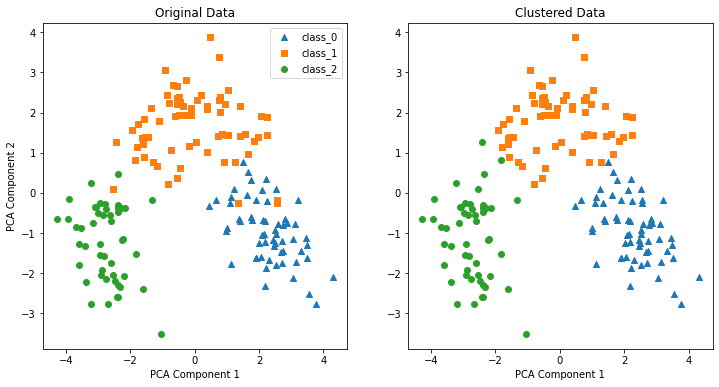

In [21]:
markers = ['^','s','o']
# 두개의 그래프 한눈에 보기
fig, axs = plt.subplots(figsize= (12,6), ncols =2, nrows= 1)
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = wine_df[wine_df[column] == i ]['PC1']
        y_axis_data = wine_df[wine_df[column] == i ]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker = marker,label = wine.target_names[i])

    if k == 0: # target인 경우
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')
    else: # cluster인 경우
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')

## 실루엣 분석

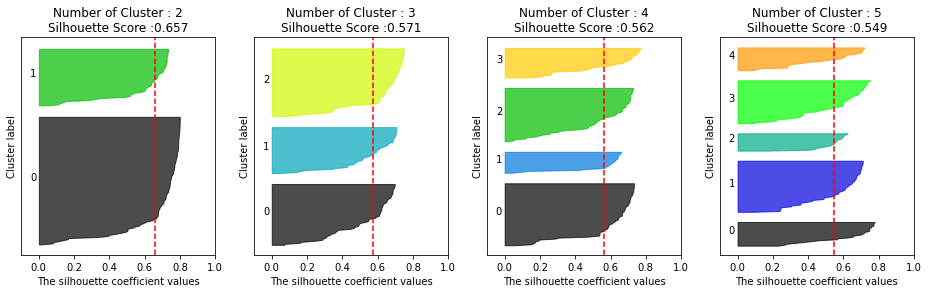

In [20]:
from visualize import visualize_silhouette

visualize_silhouette([2,3,4,5], wine.data)